In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

In [ ]:
df.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
#The most common factors among patients
common_factors = df.drop(columns=['id','num','dataset']).mode().iloc[0]
pd.DataFrame(common_factors)

,0
age,54
sex,Male
cp,asymptomatic
trestbps,120.0
chol,0.0
fbs,False
restecg,normal
thalch,150.0
exang,False
oldpeak,0.0


In [ ]:
#Number of male and female patients
gender_distribution = df['sex'].value_counts()
gender_distribution


,count
sex,
Male,726
Female,194


In [ ]:
age_distribution = df['age'].value_counts().sort_index()
age_distribution.head()

,count
age,
28,1
29,3
30,1
31,2
32,5


In [ ]:
#Average age for each patient group
Average_age = df.groupby('num')['age'].mean()
Average_age

,age
num,
0,50.547445
1,53.528302
2,57.577982
3,59.214953
4,59.214286


In [ ]:
#Correlation between variables
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()
correlation.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265


In [ ]:
#Number of cases in each phase
Number_of_cases = df['num'].value_counts()
Number_of_cases

,count
num,
0,411
1,265
2,109
3,107
4,28


In [ ]:
#Number of patients based to type of chest pain
cp_count = df['cp'].value_counts()
cp_count

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [ ]:
#Average cholesterol level for each patient group
chol_mean = df.groupby('num')['chol'].mean()
chol_mean

,chol
num,
0,227.905612
1,195.255814
2,143.859813
3,159.716981
4,192.148148


In [ ]:
#Average resting blood pressure for each patient group
trestbps_mean = df.groupby('num')['trestbps'].mean()
trestbps_mean

,trestbps
num,
0,129.913043
1,132.861111
2,133.613861
3,136.152174
4,138.720000


In [ ]:
#Distribution of the number of blocked arteries for each diagnosis
ca_counts = df.groupby('ca')['num'].value_counts().unstack()
ca_counts

num,0,1,2,3,4
ca,,,,,
0.0,133,28,9,8,3
1.0,21,20,14,9,3
2.0,8,7,9,15,2
3.0,3,3,4,5,5


In [ ]:
#The relationship between angina pectoris with exercise and the severity of the disease
exang_mean = df.groupby('exang')['num'].mean()
exang_mean

,num
exang,
False,0.623106
True,1.522255


In [ ]:
diagnosis4 = df[df['num'] == 4]
#The average age of patients for diagnosed 4
average_age_for_diagnosis4 = diagnosis4['age'].mean()
average_age_for_diagnosis4

59.214285714285715

In [ ]:
#Gender distribution of patients diagnosed with 4
gender_distribution_for_diagnosis4 = diagnosis4['sex'].value_counts()
gender_distribution_for_diagnosis4

,count
sex,
Male,26
Female,2


In [ ]:
#Average cholesterol level for patients with 4 diagnosed
average_chol_for_diagnosis4 = diagnosis4['chol'].mean()
average_chol_for_diagnosis4

192.14814814814815

In [ ]:
#Distribution of types of chest pain for patients with 4 diagnoses
cp_distribution_for_diagnosis4 = diagnosis4['cp'].value_counts()
cp_distribution_for_diagnosis4

,count
cp,
asymptomatic,23
non-anginal,4
typical angina,1


In [ ]:
#Average resting blood pressure for patients with 4 diagnosis
average_trestbps_for_diagnosis4 = diagnosis4['trestbps'].mean()
average_trestbps_for_diagnosis4

138.72

In [ ]:
#Number of blocked arteries (ca) for patients with 4 diagnosis
ca_counts_for_diagnosis4 = diagnosis4['ca'].value_counts()
ca_counts_for_diagnosis4

,count
ca,
3.0,5
1.0,3
0.0,3
2.0,2


In [ ]:
#Division of patients based to age
age_bins = [0, 30, 40, 50, 60, 70, 80]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
age_distribution = df.groupby('age_group')['num'].value_counts().unstack()
age_distribution

num,0,1,2,3,4
age_group,,,,,
<30,4,0,0,0,0
30-40,50,21,2,2,1
40-50,127,61,13,10,1
50-60,162,118,46,37,12
60-70,59,58,45,49,11
70+,9,7,3,9,3


In [ ]:
#Division of the disease based to age and sex
Disease_count_by_age_and_gender = df.groupby(['age_group', 'sex'])['num'].count().unstack()
Disease_count_by_age_and_gender

sex,Female,Male
age_group,,
<30,0,4
30-40,19,57
40-50,53,159
50-60,72,303
60-70,44,178
70+,6,25


In [ ]:
# Analysis of the intersection of health factors among patients
health_factors_intersection = df.groupby('num')[['cp', 'ca', 'thal']].apply(lambda x: x.mode().iloc[0])
health_factors_intersection

,cp,ca,thal
num,,,
0,atypical angina,0.0,normal
1,asymptomatic,0.0,reversable defect
2,asymptomatic,1.0,reversable defect
3,asymptomatic,2.0,reversable defect
4,asymptomatic,3.0,reversable defect


# **Visualization**

**1) Univariate Analysis**

Analysing the count distribution of disease


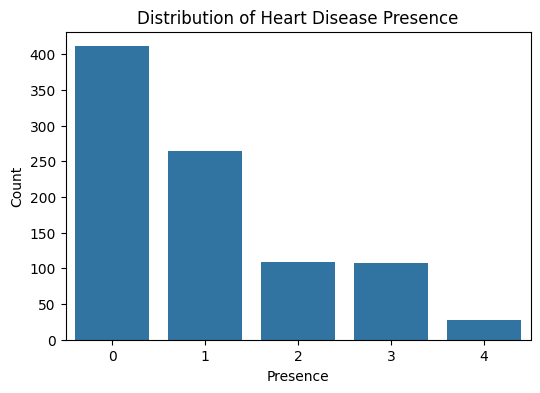

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='num',)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Presence')
plt.ylabel('Count')
plt.show()

Distribution of numerical features

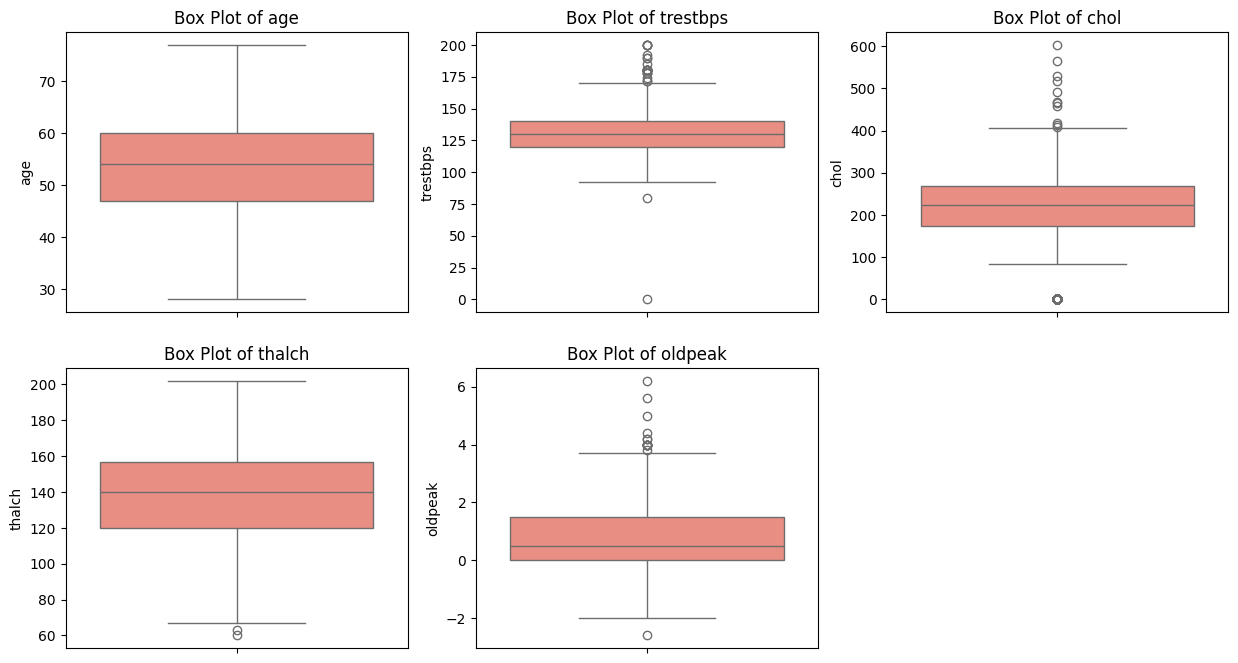

In [ ]:
continuous_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(15, 8))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='salmon')
    plt.title(f'Box Plot of {col}')
plt.show()

Distribution of Categorical features

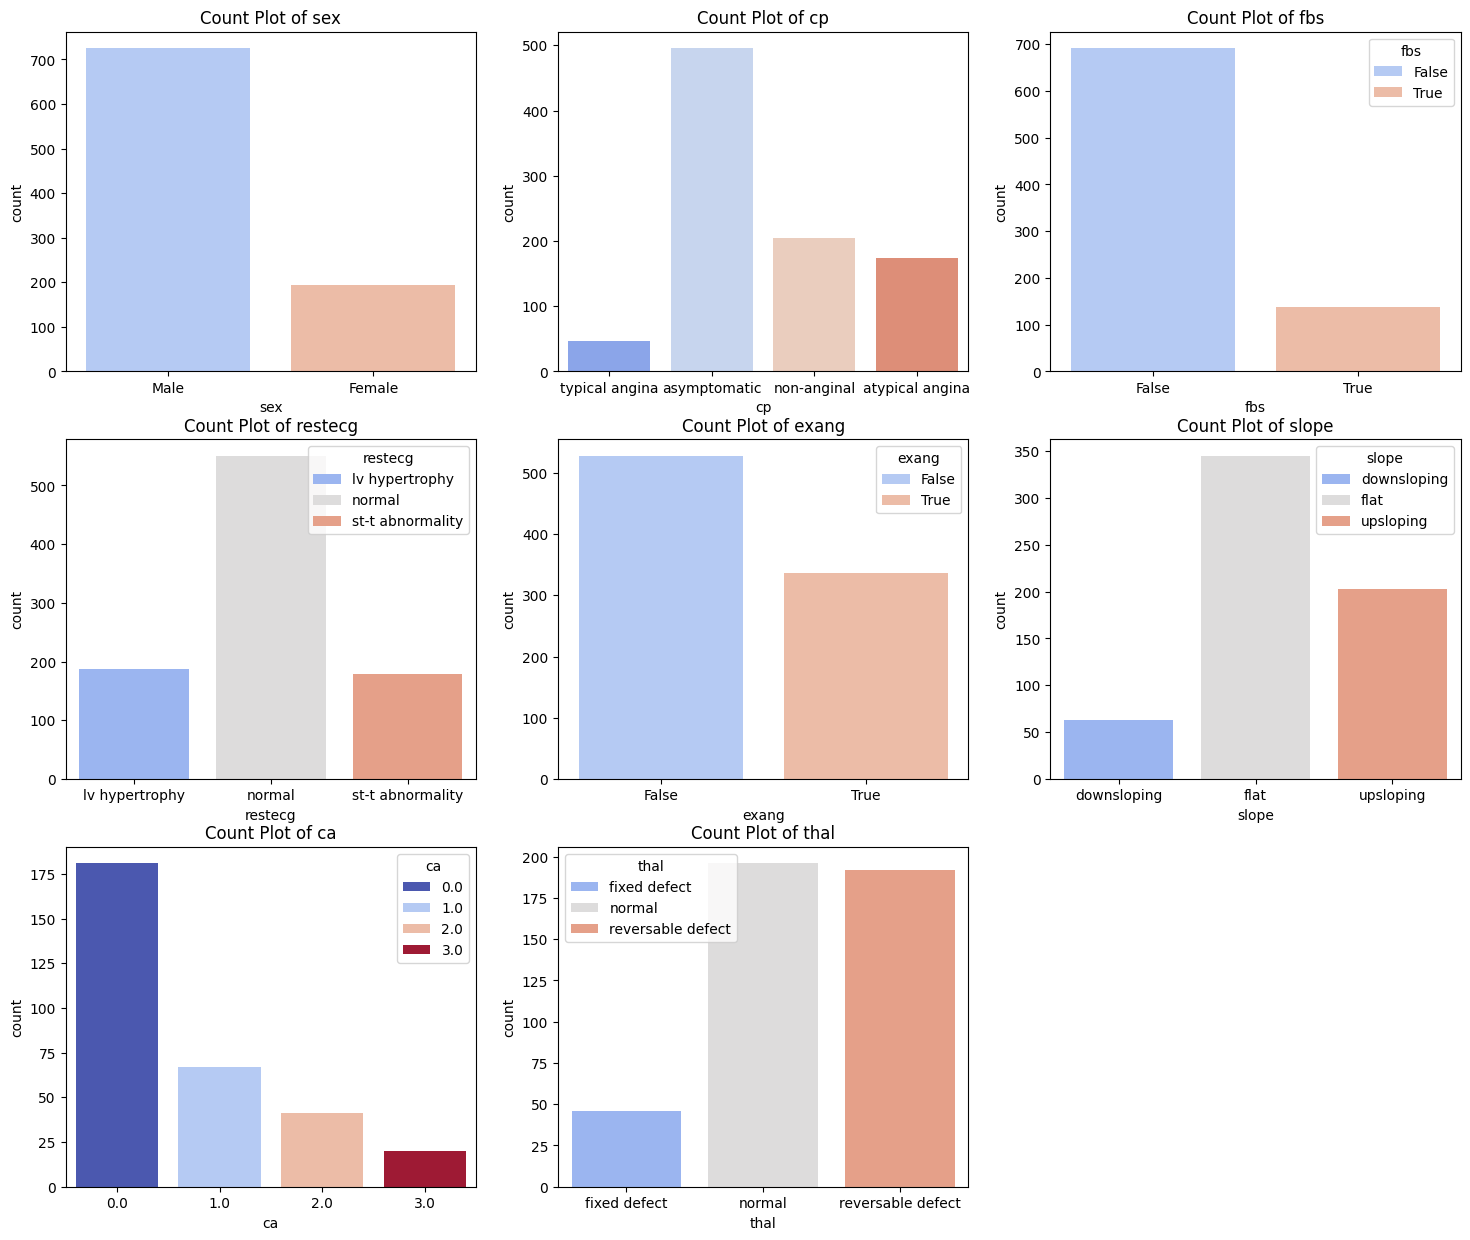

In [ ]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='coolwarm', hue=col)
    plt.title(f'Count Plot of {col}')
plt.show()

**2) Bivariate Analysis**

Analysing relationship between features and target column using Histogram for numerical features and count plot for categorical features

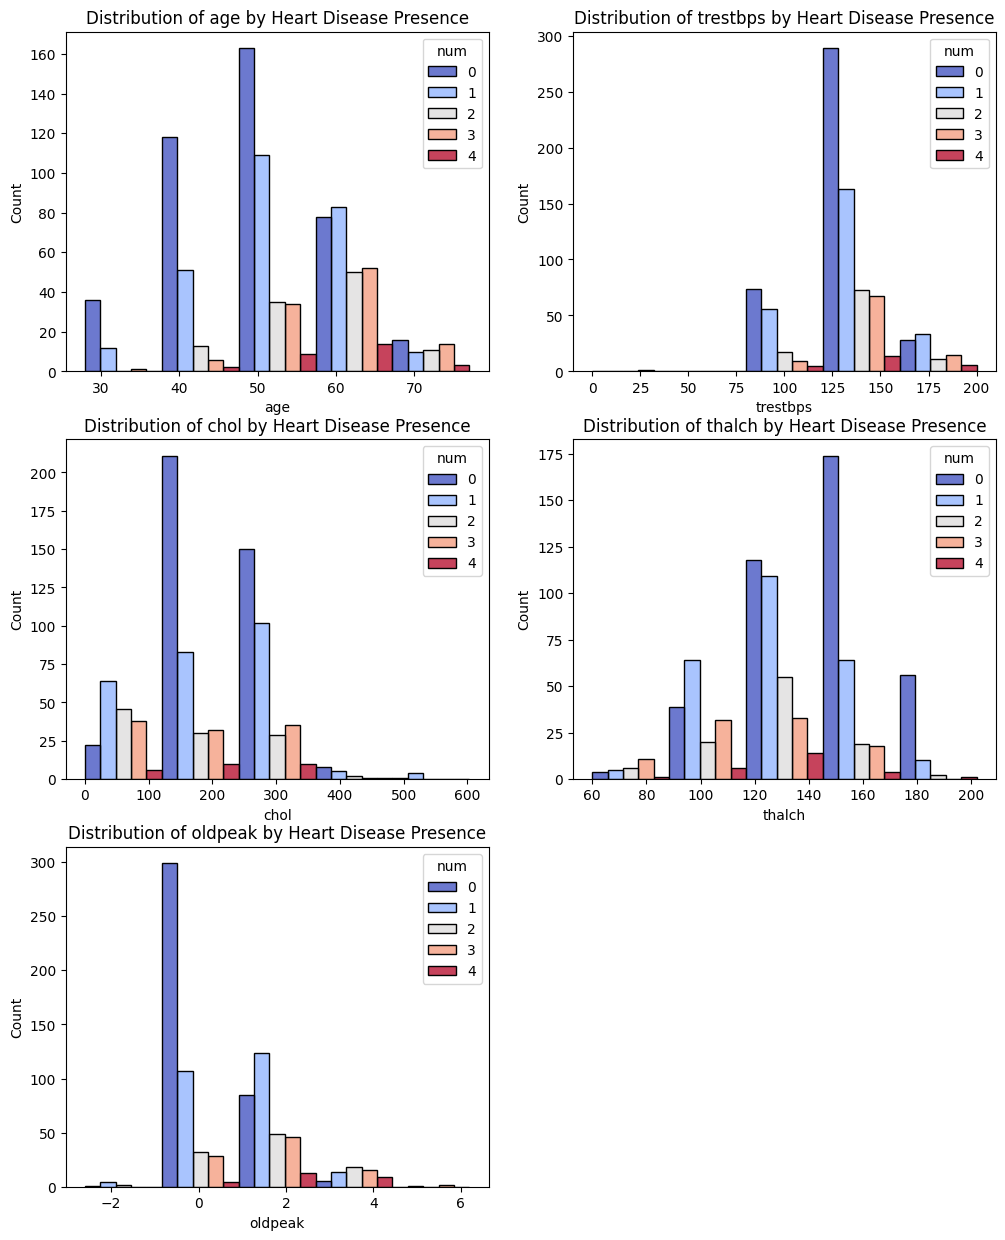

In [ ]:
plt.figure(figsize=(12, 15))
for i, feature in enumerate(continuous_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='num', multiple='dodge', palette='coolwarm', bins=5)
    plt.title(f'Distribution of {feature} by Heart Disease Presence')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.show()

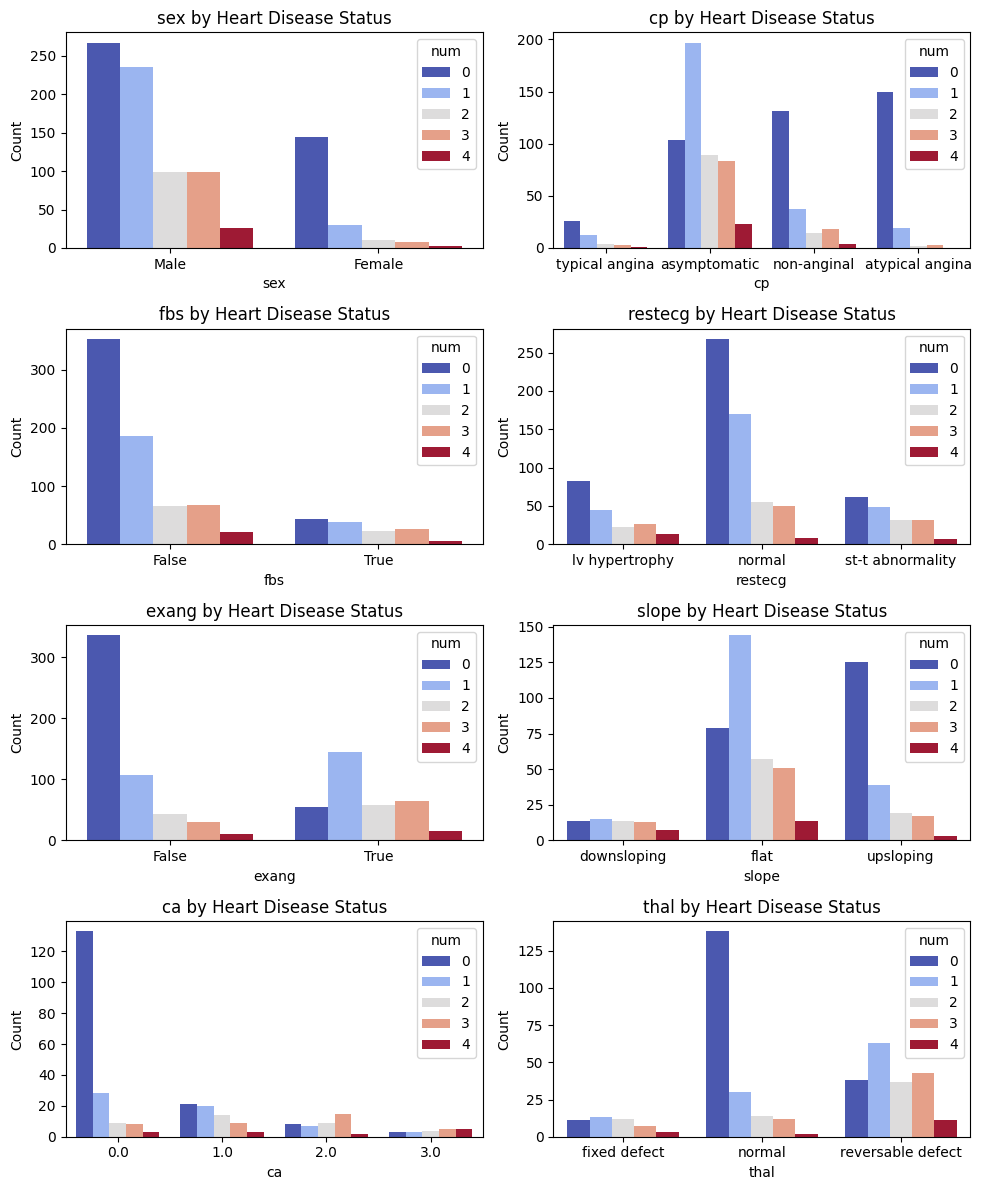

In [ ]:
plt.figure(figsize=(10, 12))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=feature, hue='num', palette='coolwarm')
    plt.title(f'{feature} by Heart Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Multivariate Analysis

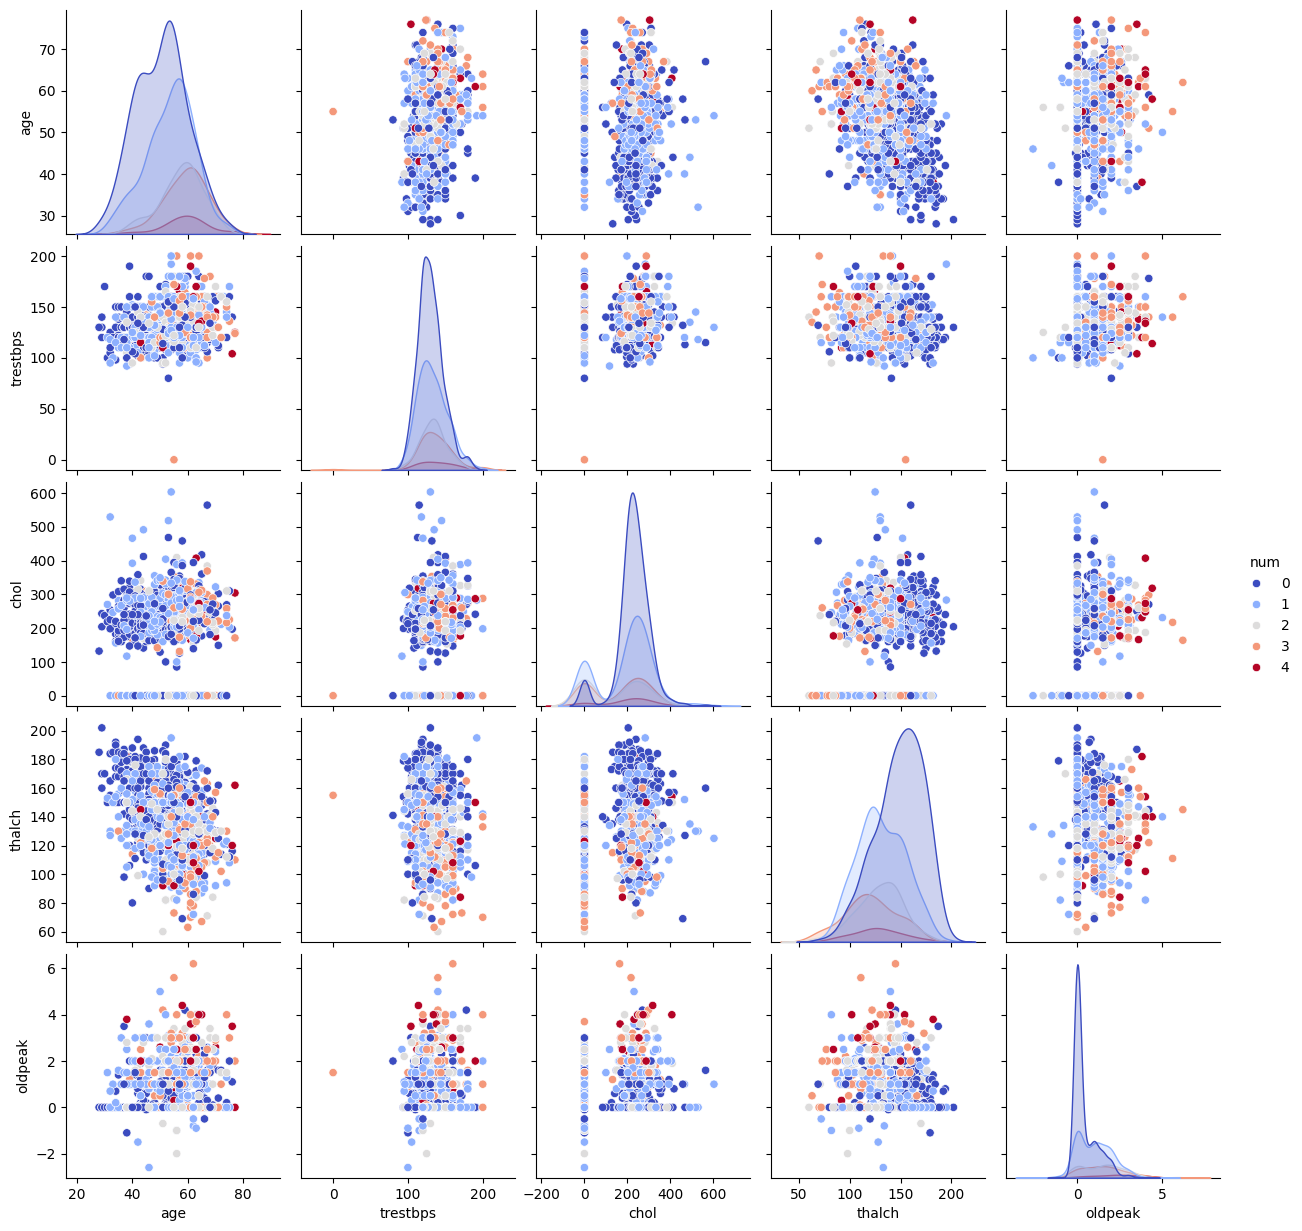

In [ ]:
sns.pairplot(df[continuous_columns + ['num']], hue='num', palette='coolwarm')
plt.show()

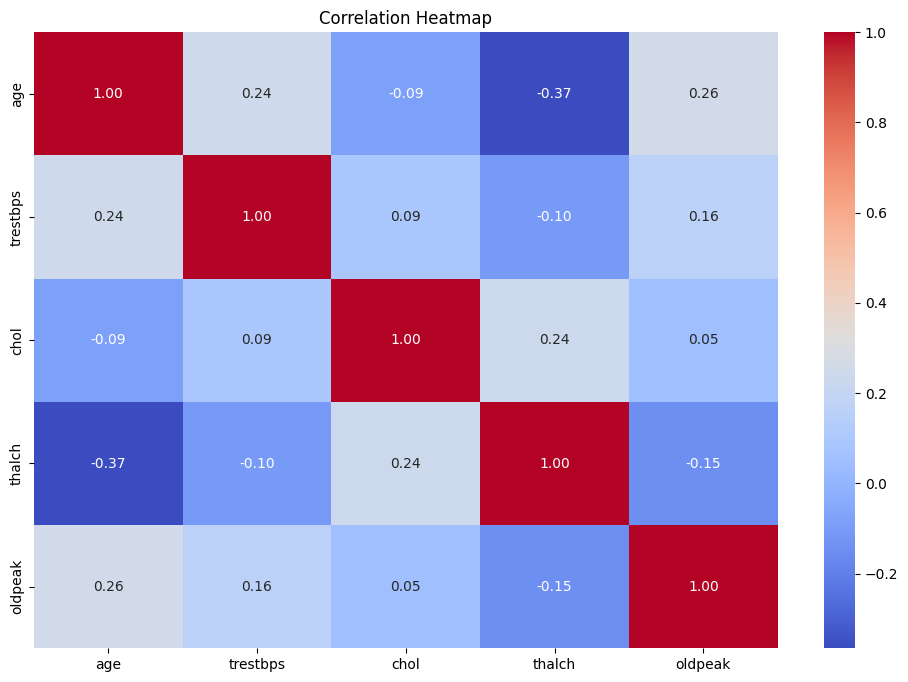

In [ ]:
correlation = df[continuous_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning

In [ ]:
#Quick data exploration
df.sample(10, random_state = 10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
242,243,49,Female,Cleveland,asymptomatic,130.0,269.0,False,normal,163.0,False,0.0,upsloping,0.0,normal,0,40-50
441,442,53,Male,Hungary,asymptomatic,130.0,182.0,False,normal,148.0,False,0.0,NaN,NaN,NaN,0,50-60
260,261,44,Female,Cleveland,non-anginal,118.0,242.0,False,normal,149.0,False,0.3,flat,1.0,normal,0,40-50
546,547,54,Male,Hungary,asymptomatic,130.0,603.0,True,normal,125.0,True,1.0,flat,NaN,NaN,1,50-60
849,850,48,Male,VA Long Beach,asymptomatic,NaN,272.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,40-50
264,265,61,Male,Cleveland,asymptomatic,138.0,166.0,False,lv hypertrophy,125.0,True,3.6,flat,1.0,normal,4,60-70
768,769,59,Male,VA Long Beach,non-anginal,NaN,0.0,False,normal,128.0,True,2.0,downsloping,NaN,NaN,2,50-60
790,791,55,Male,VA Long Beach,atypical angina,110.0,214.0,True,st-t abnormality,180.0,False,NaN,NaN,NaN,NaN,0,50-60
293,294,63,Male,Cleveland,asymptomatic,140.0,187.0,False,lv hypertrophy,144.0,True,4.0,upsloping,2.0,reversable defect,2,60-70
442,443,53,Male,Hungary,asymptomatic,140.0,243.0,False,normal,155.0,False,0.0,NaN,NaN,NaN,0,50-60


In [ ]:
# Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         920 non-null    int64   
 1   age        920 non-null    int64   
 2   sex        920 non-null    object  
 3   dataset    920 non-null    object  
 4   cp         920 non-null    object  
 5   trestbps   861 non-null    float64 
 6   chol       890 non-null    float64 
 7   fbs        830 non-null    object  
 8   restecg    918 non-null    object  
 9   thalch     865 non-null    float64 
 10  exang      865 non-null    object  
 11  oldpeak    858 non-null    float64 
 12  slope      611 non-null    object  
 13  ca         309 non-null    float64 
 14  thal       434 non-null    object  
 15  num        920 non-null    int64   
 16  age_group  920 non-null    category
dtypes: category(1), float64(5), int64(3), object(8)
memory usage: 116.2+ KB


In [ ]:
#Checking to see which columns have a null or empty data inside of them
df.isnull().any()

,0
id,False
age,False
sex,False
dataset,False
cp,False
trestbps,True
chol,True
fbs,True
restecg,True
thalch,True


In [ ]:
#Checking to see the size of error in each of the columns with erros
columns_with_errors = ["trestbps", "chol", "fbs", "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal"]
df[columns_with_errors].isnull().sum()

,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62
slope,309
ca,611
thal,486


In [ ]:
# We will drop the 2 rows with missing data from the restecg column
df = df.dropna(subset=["restecg"])
df.shape

(918, 17)

<Axes: >

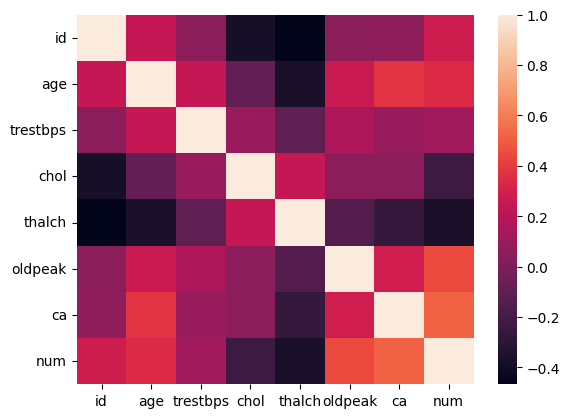

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
df.corr(numeric_only=True)["num"].sort_values()

,num
thalch,-0.366368
chol,-0.232076
trestbps,0.122379
id,0.273615
age,0.340404
oldpeak,0.443403
ca,0.516216
num,1.000000


### Handling Outliers

<Axes: xlabel='ca', ylabel='num'>

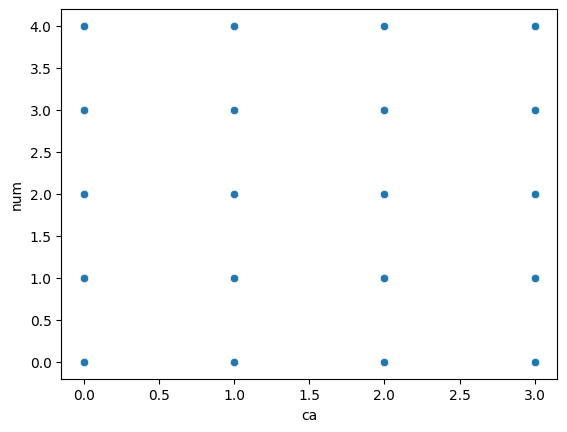

In [ ]:
sns.scatterplot(x = "ca", y = "num" , data=df)

<Axes: xlabel='oldpeak', ylabel='num'>

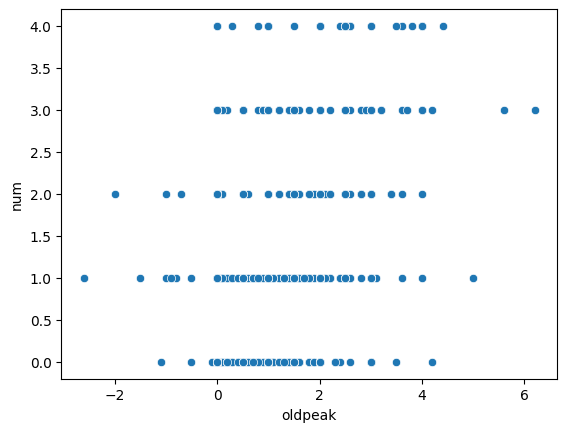

In [ ]:
# Since data is very spread, we don't have any correlation or spread between ca and num, so we
# will consider the second highest most correlated feature
sns.scatterplot(x = "oldpeak", y = "num" , data=df)

In [ ]:
df[((df["oldpeak"] < -1.6) | (df["oldpeak"] > 4.2)) & (df["num"] < 2.5)]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
589,590,50,Male,Hungary,asymptomatic,140.0,231.0,False,st-t abnormality,140.0,True,5.0,flat,NaN,NaN,1,50-60
615,616,46,Male,Switzerland,asymptomatic,100.0,0.0,NaN,st-t abnormality,133.0,False,-2.6,flat,NaN,NaN,1,40-50
653,654,56,Male,Switzerland,non-anginal,125.0,0.0,NaN,normal,98.0,False,-2.0,flat,NaN,reversable defect,2,50-60


In [ ]:
# We will drop these few rows, and then we will check for correlation again
df = df.drop(df[((df["oldpeak"] < -1.6) | (df["oldpeak"] > 4.2)) & (df["num"] < 2.5)].index, axis = 0)
df["oldpeak"].corr(df["num"])

0.45485389349256744

<Axes: xlabel='oldpeak', ylabel='num'>

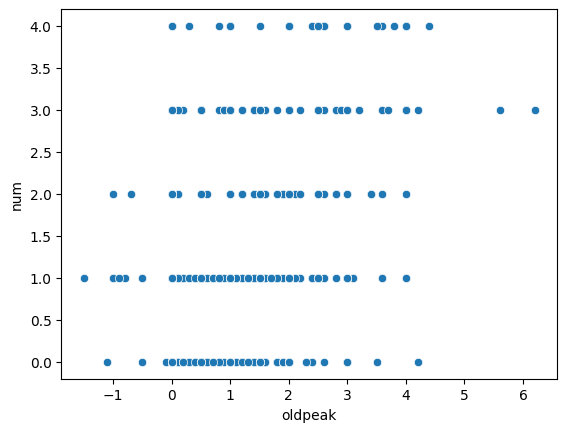

In [ ]:
#There is a slight increase in the correlation
sns.scatterplot(x = "oldpeak", y = "num" , data=df)

<Axes: xlabel='trestbps', ylabel='num'>

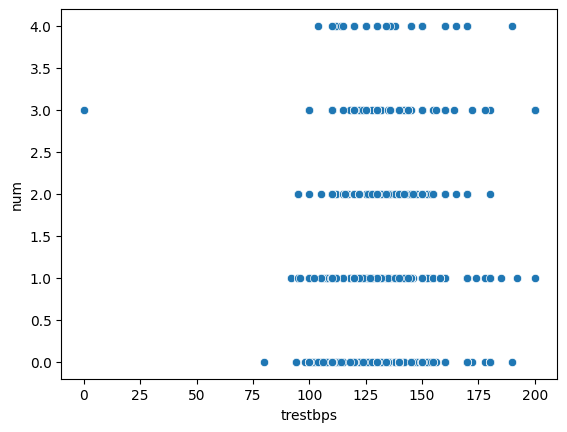

In [ ]:
# We did consider the age, but it didn't have much outliers
sns.scatterplot(x = "trestbps", y = "num" , data=df)

In [ ]:
df[((df["trestbps"] < 25))]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3,50-60


In [ ]:
df = df.drop(df[ ((df["trestbps"] < 25))].index, axis = 0)
df["trestbps"].corr(df["num"])

0.1421261704992644

<Axes: xlabel='trestbps', ylabel='num'>

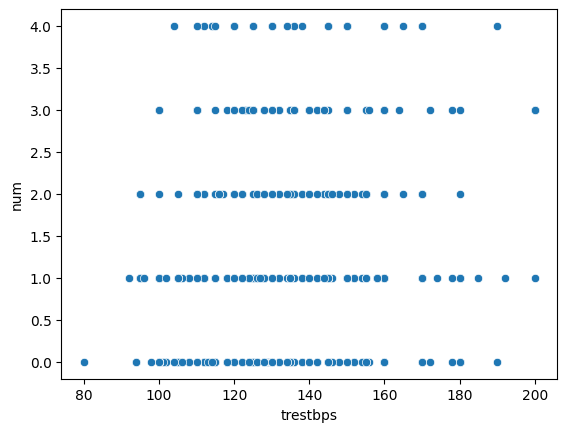

In [ ]:
#There is a slight increase in the correlation as well
sns.scatterplot(x = "trestbps", y = "num" , data = df)

### Handling Missing Data

In [ ]:
#  Checking for data with the highest percentage of null values
null_data = (df.isnull().sum() / len(df) * 100).loc[lambda x: x > 0].sort_values()
null_data

,0
chol,3.282276
thalch,6.017505
exang,6.017505
trestbps,6.455142
oldpeak,6.783370
fbs,9.518600
slope,33.698031
thal,52.625821
ca,66.192560


Text(0, 0.5, 'Percentage of Null Values')

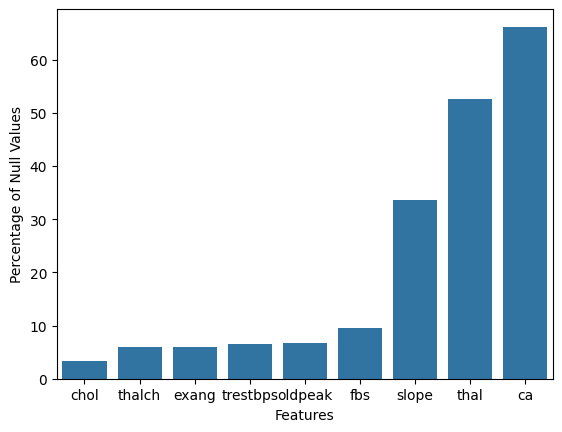

In [ ]:
#Now we visualize the remaining features with null values
sns.barplot(x = null_data.index, y = null_data)
plt.xlabel("Features")
plt.ylabel("Percentage of Null Values")

In [ ]:
# We will deal with the numeric values as follows:
df["trestbps"] = df["trestbps"].fillna(df["trestbps"].mean())

In [ ]:
df["chol"] = df["chol"].fillna(df["chol"].mean())

In [ ]:
df["thalch"] = df["thalch"].fillna(df["thalch"].mean())

In [ ]:
df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].mean())

In [ ]:
# We rounded the data in the ca columns specifically because is an integer betweem 1 and 3
df["ca"] = df["ca"].fillna(round(df["ca"].mean()))

In [ ]:
null_data_2 = (df.isnull().sum() / len(df) * 100).loc[lambda x: x > 0].sort_values()
null_data_2

,0
exang,6.017505
fbs,9.518600
slope,33.698031
thal,52.625821


Text(0, 0.5, 'Percentage of Null Values')

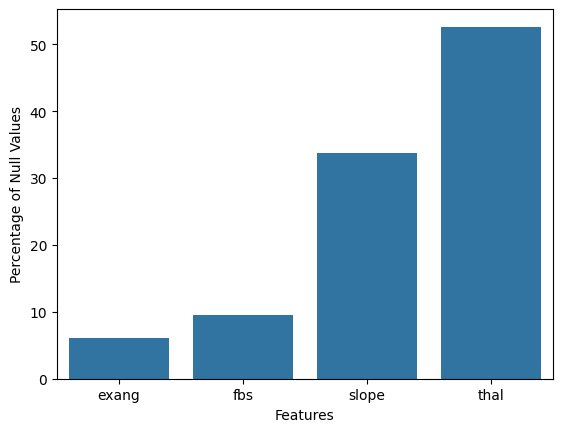

In [ ]:
#Now we visualize the remaining features with null values
sns.barplot(x = null_data_2.index, y = null_data_2)
plt.xlabel("Features")
plt.ylabel("Percentage of Null Values")

In [ ]:
df["exang"].fillna(df["exang"].mode()[0], inplace=True)

In [ ]:
df["fbs"].fillna(df["fbs"].mode()[0], inplace=True)

In [ ]:
df["slope"].fillna(df["slope"].mode()[0], inplace=True)

In [ ]:
df["thal"].fillna(df["thal"].mode()[0], inplace=True)

In [ ]:
#We make sure we have no missing data
null_data_3 = (df.isnull().sum() / len(df) * 100).loc[lambda x: x > 0].sort_values()
null_data_3

,0


### Data Scalling and Encoding

In [ ]:
#Data Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[["trestbps", "chol", "thalch", "oldpeak"]]) # We chose the MinMaxScaler to make the values between 0 and 1

array([[0.54166667, 0.38640133, 0.63380282, 0.49350649],
       [0.66666667, 0.47429519, 0.33802817, 0.38961039],
       [0.33333333, 0.37976783, 0.48591549, 0.53246753],
       ...,
       [0.35      , 0.36981758, 0.28169014, 0.19480519],
       [0.43612086, 0.6384743 , 0.54617226, 0.30941711],
       [0.33333333, 0.4212272 , 0.23239437, 0.19480519]])

In [ ]:
df.select_dtypes(include='object')

,sex,dataset,cp,restecg,slope,thal
0,Male,Cleveland,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,Cleveland,asymptomatic,lv hypertrophy,flat,normal
2,Male,Cleveland,asymptomatic,lv hypertrophy,flat,reversable defect
3,Male,Cleveland,non-anginal,normal,downsloping,normal
4,Female,Cleveland,atypical angina,lv hypertrophy,upsloping,normal
...,...,...,...,...,...,...
915,Female,VA Long Beach,asymptomatic,st-t abnormality,flat,normal
916,Male,VA Long Beach,typical angina,st-t abnormality,flat,normal
917,Male,VA Long Beach,asymptomatic,st-t abnormality,flat,fixed defect
918,Male,VA Long Beach,asymptomatic,lv hypertrophy,flat,normal


In [ ]:
categorical_columns = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]
encoded_df = pd.get_dummies(df[categorical_columns], drop_first = True, dtype = int)
encoded_df

,fbs,exang,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,True,False,1,0,0,0,0,0,1,0,0,0,0,0,0
1,False,True,1,0,0,0,0,0,0,0,0,1,0,1,0
2,False,True,1,0,0,0,0,0,0,0,0,1,0,0,1
3,False,False,1,0,0,0,0,1,0,1,0,0,0,1,0
4,False,False,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,True,False,0,0,0,1,0,0,0,0,1,1,0,1,0
916,False,False,1,0,0,1,0,0,1,0,1,1,0,1,0
917,True,False,1,0,0,1,0,0,0,0,1,1,0,0,0
918,True,False,1,0,0,1,0,0,0,0,0,1,0,1,0


In [ ]:
df_dropped = df.drop(columns = categorical_columns)
df_final = pd.concat([df_dropped,encoded_df], axis=1)
df_final

,id,age,trestbps,chol,thalch,oldpeak,ca,num,age_group,fbs,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.000000,233.0,150.000000,2.300000,0.0,0,60-70,True,...,0,0,0,1,0,0,0,0,0,0
1,2,67,160.000000,286.0,108.000000,1.500000,3.0,2,60-70,False,...,0,0,0,0,0,0,1,0,1,0
2,3,67,120.000000,229.0,129.000000,2.600000,2.0,1,60-70,False,...,0,0,0,0,0,0,1,0,0,1
3,4,37,130.000000,250.0,187.000000,3.500000,0.0,0,30-40,False,...,0,0,1,0,1,0,0,0,1,0
4,5,41,130.000000,204.0,172.000000,1.400000,0.0,0,40-50,False,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,1.0,1,50-60,True,...,1,0,0,0,0,1,1,0,1,0
916,917,62,132.334503,139.0,137.556461,0.882512,1.0,0,60-70,False,...,1,0,0,1,0,1,1,0,1,0
917,918,55,122.000000,223.0,100.000000,0.000000,1.0,2,50-60,True,...,1,0,0,0,0,1,1,0,0,0
918,919,58,132.334503,385.0,137.556461,0.882512,1.0,0,50-60,True,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        914 non-null    int64   
 1   age                       914 non-null    int64   
 2   trestbps                  914 non-null    float64 
 3   chol                      914 non-null    float64 
 4   thalch                    914 non-null    float64 
 5   oldpeak                   914 non-null    float64 
 6   ca                        914 non-null    float64 
 7   num                       914 non-null    int64   
 8   age_group                 914 non-null    category
 9   fbs                       914 non-null    bool    
 10  exang                     914 non-null    bool    
 11  sex_Male                  914 non-null    int64   
 12  dataset_Hungary           914 non-null    int64   
 13  dataset_Switzerland       914 non-null    int64   
 14 

In [ ]:
X = df_final.drop(columns = ["id", "num",'age_group'])
y = df_final["num"]

In [ ]:
X.shape

(914, 21)

In [ ]:
y.shape

(914,)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, mean_squared_error, precision_score,
                             recall_score, roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

((731, 21), (183, 21), (731,), (183,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc = SVC(kernel='linear', C=0.1, degree=2, probability=True)

In [ ]:
scores = cross_val_score(svc, X_train, y_train, cv=5)
mean_accuracy = scores.mean()

In [ ]:
svc.fit(X_train, y_train)

SVC(C=0.1, degree=2, kernel='linear', probability=True)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(pd.get_dummies(y_test), svc.predict_proba(X_test), multi_class='ovr')

In [ ]:
print("Cross-validation Accuracy:", mean_accuracy)

Cross-validation Accuracy: 0.593775044264281


In [ ]:
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5846994535519126


In [ ]:
print("RMSE:", rmse)

RMSE: 1.06355420218417


In [ ]:
print("Precision:", precision)

Precision: 0.5111168300863851


In [ ]:
print("Recall:", recall)

Recall: 0.5846994535519126


In [ ]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.824121213375291


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        76
           1       0.51      0.59      0.55        56
           2       0.29      0.09      0.14        22
           3       0.23      0.13      0.17        23
           4       0.00      0.00      0.00         6

    accuracy                           0.58       183
   macro avg       0.35      0.34      0.33       183
weighted avg       0.51      0.58      0.53       183



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[69  5  1  1  0]
 [21 33  0  2  0]
 [ 2 13  2  5  0]
 [ 6 11  3  3  0]
 [ 0  3  1  2  0]]


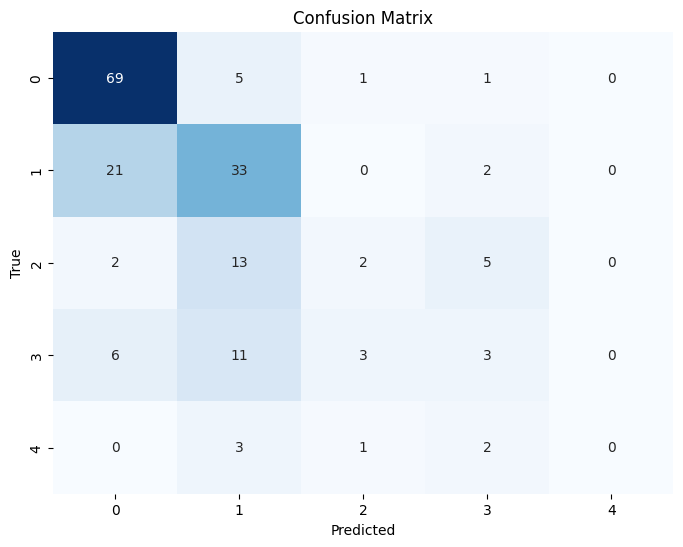

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob')


In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5)
mean_accuracy = scores.mean()

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), multi_class='ovr')


In [ ]:
print("Cross-validation Accuracy:", mean_accuracy)

Cross-validation Accuracy: 0.5444133817910725


In [ ]:
print("Test Accuracy:", accuracy)

Test Accuracy: 0.6120218579234973


In [ ]:
print("RMSE:", rmse)

RMSE: 1.0964423342564473


In [ ]:
print("Precision:", precision)

Precision: 0.592481620196976


In [ ]:
print("Recall:", recall)

Recall: 0.6120218579234973


In [ ]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.8241673639948832


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        76
           1       0.59      0.57      0.58        56
           2       0.30      0.27      0.29        22
           3       0.47      0.30      0.37        23
           4       0.40      0.33      0.36         6

    accuracy                           0.61       183
   macro avg       0.50      0.47      0.48       183
weighted avg       0.59      0.61      0.60       183



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[65  7  1  3  0]
 [12 32  8  3  1]
 [ 6  8  6  1  1]
 [ 5  6  4  7  1]
 [ 1  1  1  1  2]]


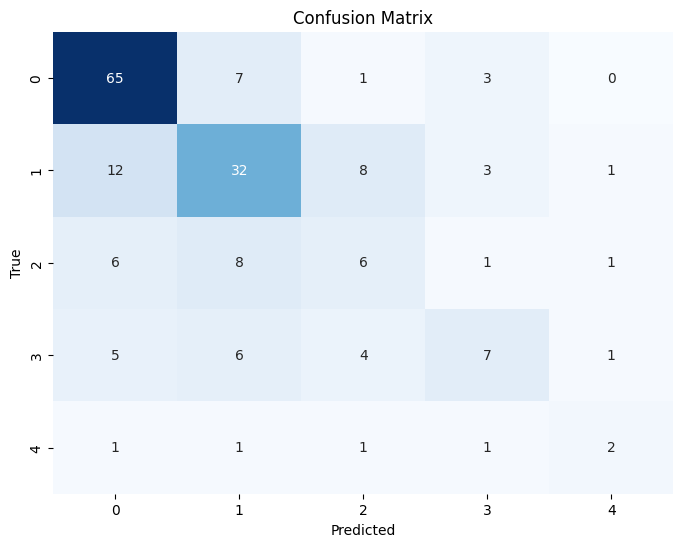

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 59.02%


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        76
           1       0.53      0.55      0.54        56
           2       0.33      0.18      0.24        22
           3       0.38      0.26      0.31        23
           4       0.00      0.00      0.00         6

    accuracy                           0.59       183
   macro avg       0.39      0.38      0.37       183
weighted avg       0.54      0.59      0.56       183



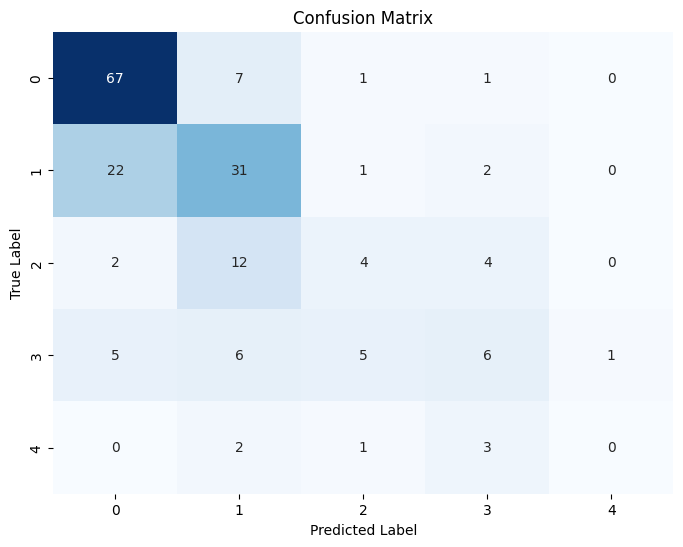

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")

y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best n_estimators: 100


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 61.20%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        76
           1       0.56      0.59      0.57        56
           2       0.25      0.14      0.18        22
           3       0.38      0.22      0.28        23
           4       0.33      0.17      0.22         6

    accuracy                           0.61       183
   macro avg       0.45      0.41      0.41       183
weighted avg       0.56      0.61      0.58       183



In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[70  3  1  2  0]
 [17 33  4  1  1]
 [ 4 12  3  3  0]
 [ 5  9  3  5  1]
 [ 0  2  1  2  1]]


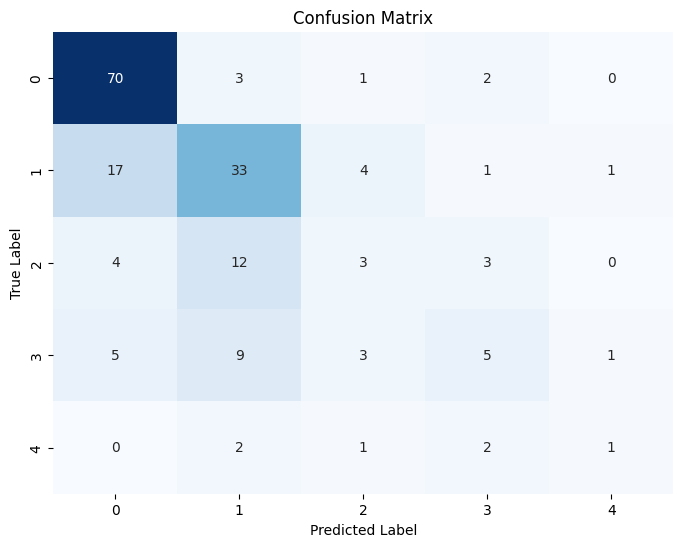

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
roc_auc = roc_auc_score(pd.get_dummies(y_test), svc.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.82


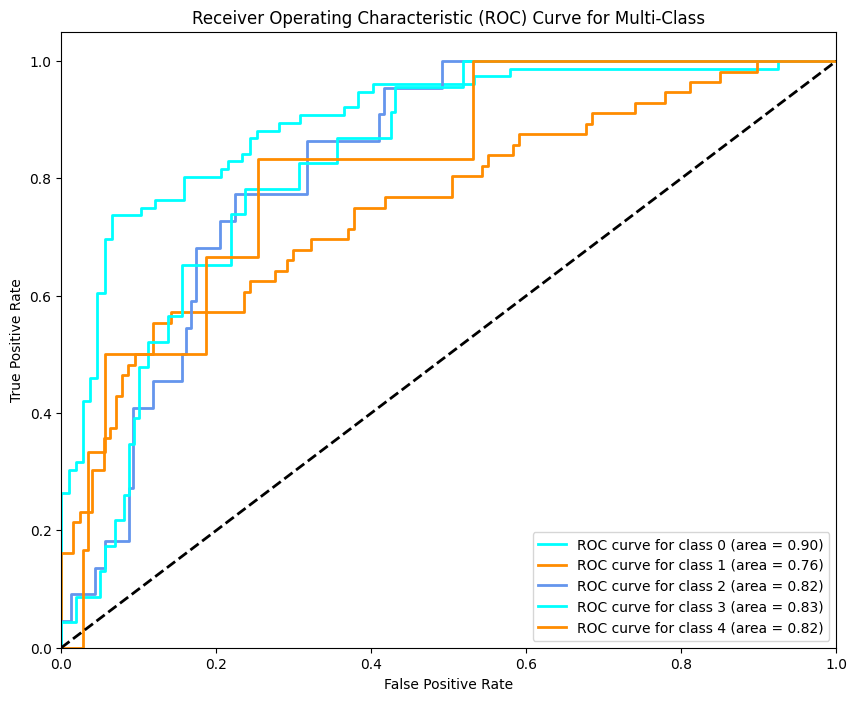

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

y_score = svc.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 1.04
